# Pêche morutière française 1500-1950

Données issues de :

Hersart de La Villemarqué Jacqueline, La  pêche morutière française de 1500 à 1950 : statistiques, climat et société, Plouzané, IFREMER, 1995, https://archimer.ifremer.fr/doc/00486/59783/

et de :

Auffray Jean-Michel, « Entre grande pêche et commerce », Annales de Bretagne et des Pays de l’Ouest. Anjou. Maine. Poitou-Charente. Touraine 117 (4), 2010, pp. 165‑194. En ligne: <https://doi.org/10.4000/abpo.1846>.




Voir aussi:

Conan Joseph, _Lettres d’un capitaine terre-neuvas_, Rennes, Presses universitaires de Rennes, 2013 (Mémoire commune). En ligne: <http://books.openedition.org/pur/43904>, consulté le 10.12.2021.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql

## Récupération des données à analyser

Pour la préparation des données, voir le carnet _villemarque_peche_morutiere_prod_data.ipynb_

In [2]:
db_path = 'data/peche_atlantique.sqlite'
cn = sql.connect(db_path)

In [3]:
query = "SELECT * FROM peche_morutiere"

In [4]:
peche_morutiere = pd.read_sql_query(query,cn)

In [5]:
print(len(peche_morutiere))
# peche_morutiere['valeurs'] = peche_morutiere['valeurs'].apply(lambda x: x.split('///'))
peche_morutiere[:2], peche_morutiere[-2:]

2553


(   id                                            valeurs  champs  n_page  \
 0   0  1508///BREHAT///1///30///0///0///0. MORANDIERE...       7      86   
 1   1     1508///ROUEN///4///1///0///0///o' DARDEL 1941        7      86   
 
      port  annee eff_bateaux lieu_peche code  \
 0  BREHAT   1508           1         30   30   
 1   ROUEN   1508           4          1    1   
 
                                                label _merge  
 0                               Côtes de Terre-Neuve   both  
 1  Lieu de pêche imprécis, Terre-Neuve au sens large   both  ,
         id                                            valeurs  champs  n_page  \
 2551  2551  1950///LA ROCHELLE///2///30///0///0///2438///S...       8     134   
 2552  2552  1950///; BORDEAUX///7///30///0///0,///16407///...       8     134   
 
              port  annee eff_bateaux lieu_peche code                 label  \
 2551  LA ROCHELLE   1950           2         30   30  Côtes de Terre-Neuve   
 2552     BORDEAUX   1

In [6]:
cn.close()

In [7]:
### Nettoyer la colonne en transformant en entiers
peche_morutiere['eff_bateaux'] = peche_morutiere['eff_bateaux'].apply(lambda x: int(x) if x.isdigit() else 0)

In [8]:
### regrouper et additionner le nombre de bateaux par année

g_annee = peche_morutiere.groupby(['annee'])['eff_bateaux'].sum().reset_index(name='sum')
g_annee.head()

,annee,sum
0,1508,5
1,1510,2
2,1512,1
3,1517,1
4,1520,4


In [62]:
count_annees = list(g_annee.iloc[35:45].to_records())
count_annees

[(35, 1554, 1),
 (36, 1555, 109),
 (37, 1556, 8),
 (38, 1557, 12),
 (39, 1558, 4),
 (40, 1559, 51),
 (41, 1560, 38),
 (42, 1561, 31),
 (43, 1562, 3),
 (44, 1563, 11)]

In [9]:
i = 1501
years_list = []
while i < 1951:
    years_list.append(i)
    i += 1
years_list[:5]   


[1501, 1502, 1503, 1504, 1505]

In [10]:
df_years = pd.DataFrame(years_list, columns=['annee'])
df_years.head()

,annee
0,1501
1,1502
2,1503
3,1504
4,1505


In [17]:
### Fusionner les tables des années consécutives et des voyages
years_count = df_years.merge(g_annee, left_on = 'annee', right_on ='annee', how='left', indicator=True)
years_count['sum'] = years_count['sum'].fillna(int(0)).values.astype(int)
years_count = years_count.set_index('annee')
years_count[:10]

,sum,_merge
annee,,
1501,0,left_only
1502,0,left_only
1503,0,left_only
1504,0,left_only
1505,0,left_only
1506,0,left_only
1507,0,left_only
1508,5,both
1509,0,left_only


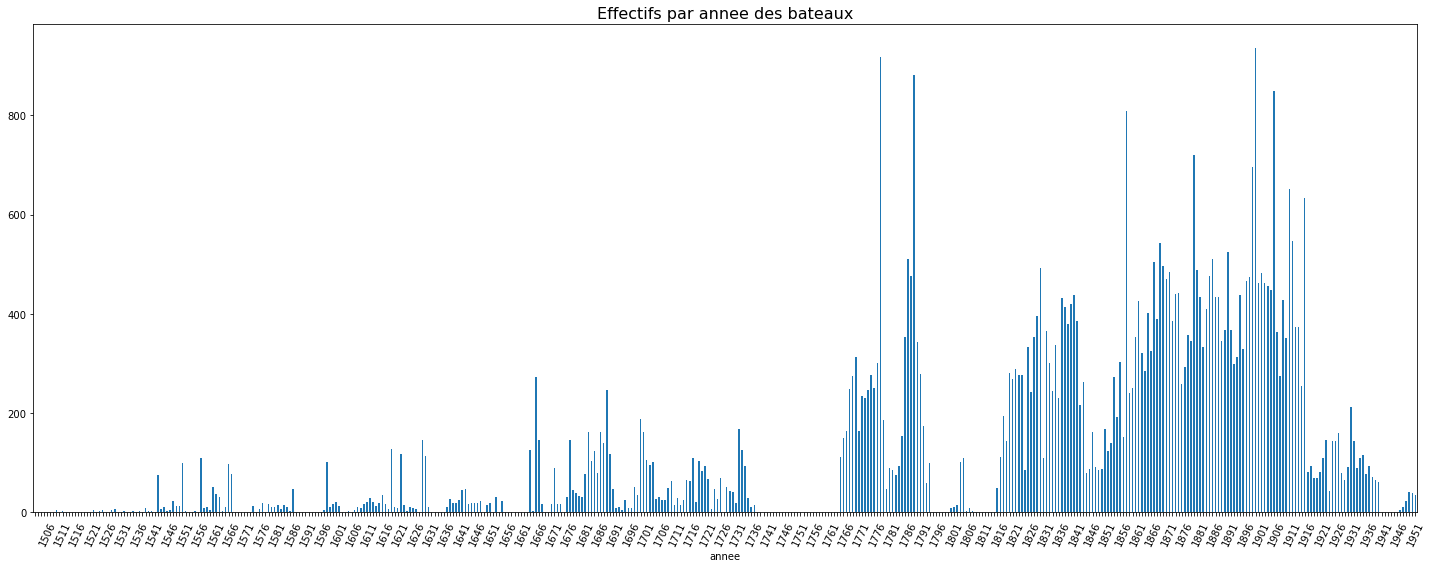

In [12]:
###  https://stackoverflow.com/questions/47838680/matplotlib-xticks-values-in-bar-chart


fig, ax = plt.subplots(figsize = (20,8))
years_count['sum'].plot(kind='bar')
new_xticks = [a+1 if a % 5 == 0  else None for a in years_count.index ]

idx = np.asarray([i for i in range(len(years_count))])

ax.set_xticks(idx)
ax.set_xticklabels(new_xticks, rotation=65)

plt.title('Effectifs par annee des bateaux',fontsize=16)

fig.tight_layout()

plt.show()

# Analyse des données

## Délimitation de périodes chronologiques

In [18]:
exp = peche_morutiere[(peche_morutiere['annee'].between(1811,1900)) & (peche_morutiere['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)
# Pour tester : 1841,1850
# 1831,1880

In [19]:
exp_1 = peche_morutiere[(peche_morutiere['annee'].between(1821,1860)) & (peche_morutiere['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)

In [20]:
exp_2 = peche_morutiere[(peche_morutiere['annee'].between(1861,1900)) & (peche_morutiere['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO"))][['annee','port','eff_bateaux','lieu_peche','label']]
# dir(exp)

In [21]:
exp['eff_bateaux'].sum()

7199

In [22]:
exp_1['eff_bateaux'].sum()

1367

In [23]:
exp_2['eff_bateaux'].sum()

5693

In [102]:
exp[:2].to_records()

rec.array([(893, 1816, 'SAINT BRIEUC', 24, '30', 'Côtes de Terre-Neuve'),
           (921, 1818, 'SAINT BRIEUC', 29, '30', 'Côtes de Terre-Neuve')],
          dtype=[('index', '<i8'), ('annee', '<i8'), ('port', 'O'), ('eff_bateaux', '<i8'), ('lieu_peche', 'O'), ('label', 'O')])

In [103]:
exp[:5]

,annee,port,eff_bateaux,lieu_peche,label
893,1816,SAINT BRIEUC,24,30,Côtes de Terre-Neuve
921,1818,SAINT BRIEUC,29,30,Côtes de Terre-Neuve
923,1818,SAINT MALO,46,30,Côtes de Terre-Neuve
924,1818,SAINT MALO,2,10,Grand Banc de Terre-Neuve
937,1820,SAINT BRIEUC,38,30,Côtes de Terre-Neuve


In [24]:
### regrouper et additionner par port et destination pour toute la période
g_port = exp.groupby(['annee','port'])['eff_bateaux'].sum().reset_index(name='sum')
g_port.iloc[35:45]

,annee,port,sum
35,1862,PAIMPOL,33
36,1862,SAINT BRIEUC,13
37,1862,SAINT MALO,1
38,1863,BINIC,39
39,1863,PAIMPOL,42
40,1863,SAINT BRIEUC,60
41,1863,SAINT MALO,2
42,1864,SAINT BRIEUC,57
43,1864,SAINT MALO,5
44,1865,PAIMPOL,50


In [25]:
g_port[g_port['sum']>0]

,annee,port,sum
0,1816,SAINT BRIEUC,24
1,1818,SAINT BRIEUC,29
2,1818,SAINT MALO,48
3,1820,SAINT BRIEUC,38
4,1822,SAINT MALO,74
...,...,...,...
165,1899,SAINT MALO,72
166,1900,BINIC,12
167,1900,PAIMPOL,39
168,1900,SAINT BRIEUC,10


In [27]:
### regrouper et additionner par port et destination pour toute la période
g = exp.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,173
1,BINIC,Iles Saint-Pierre-et-Miquelon,2
2,BINIC,Islande,265
3,PAIMPOL,Côtes de Terre-Neuve,145
4,PAIMPOL,Grand Banc de Terre-Neuve,1
5,PAIMPOL,Islande,1773
6,SAINT BRIEUC,Côtes de Terre-Neuve,969
7,SAINT BRIEUC,Islande,685
8,SAINT MALO,Côtes de Terre-Neuve,2430
9,SAINT MALO,Grand Banc de Terre-Neuve,285


In [28]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv = pd.pivot_table(g,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,173,0,2,265,440
PAIMPOL,145,1,0,1773,1919
SAINT BRIEUC,969,0,0,685,1654
SAINT MALO,2430,285,27,115,2857
Total,3717,286,29,2838,6870


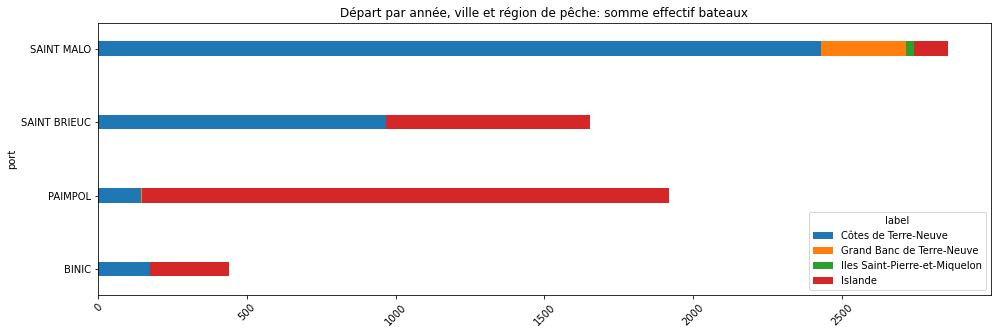

In [29]:
exp_piv.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux')
plt.xticks(rotation=45)
plt.show()

In [30]:
### Total général, dernière cellule de la dernière ligne
exp_piv.iat[-1,-1]

6870

In [31]:
exp_piv.iloc[:-1,:-1]

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande
port,,,,
BINIC,173,0,2,265
PAIMPOL,145,1,0,1773
SAINT BRIEUC,969,0,0,685
SAINT MALO,2430,285,27,115


In [32]:
tx = exp_piv.loc[:,["Total"]]
ty = exp_piv.loc[["Total"],:]
n = exp_piv.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


label         Côtes de Terre-Neuve  Grand Banc de Terre-Neuve  \
port                                                            
BINIC                          238                         18   
PAIMPOL                       1038                         79   
SAINT BRIEUC                   894                         68   
SAINT MALO                    1545                        118   
Total                         3717                        286   

label         Iles Saint-Pierre-et-Miquelon  Islande  Total  
port                                                         
BINIC                                     1      181    440  
PAIMPOL                                   8      792   1919  
SAINT BRIEUC                              6      683   1654  
SAINT MALO                               12     1180   2857  
Total                                    29     2838   6870  


In [33]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (exp_piv-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


label         Côtes de Terre-Neuve  Grand Banc de Terre-Neuve  \
port                                                            
BINIC                          -65                        -18   
PAIMPOL                       -893                        -78   
SAINT BRIEUC                    74                        -68   
SAINT MALO                     884                        166   

label         Iles Saint-Pierre-et-Miquelon  Islande  
port                                                  
BINIC                                     0       83  
PAIMPOL                                  -8      980  
SAINT BRIEUC                             -6        1  
SAINT MALO                               14    -1065  


In [34]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((exp_piv-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande
port,,,,
BINIC,17.780942,18.317322,0.010956,38.116417
PAIMPOL,768.521187,77.901018,8.100582,1212.138278
SAINT BRIEUC,6.136799,68.856477,6.981951,0.004390
SAINT MALO,505.801678,231.858254,18.507294,961.433410


3940.466954624855


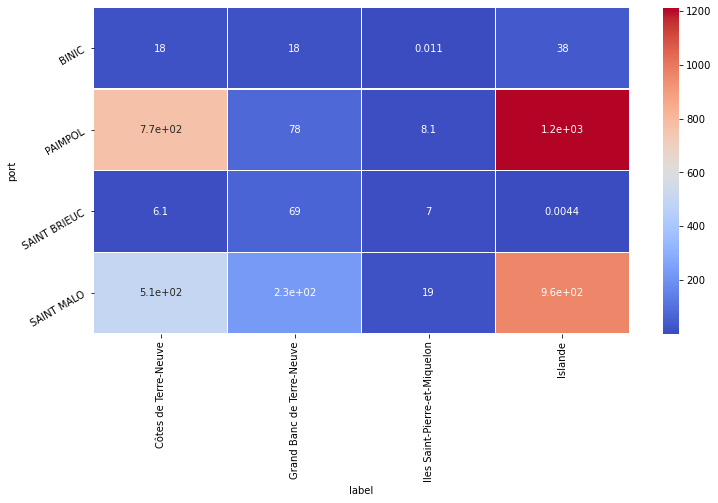

In [35]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(12,6))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)

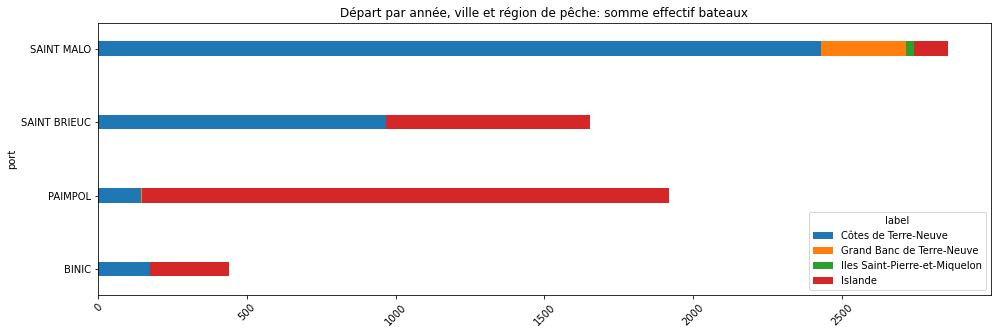

In [37]:
### La distribution ci-dessous illustre la 'heatmap' des écarts ci-dessus

exp_piv.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux')
plt.xticks(rotation=45)
plt.show()

### Première période -> 1860

In [38]:
### regrouper et additionner par port et destination pour toute la période
g1 = exp_1.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g1

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,30
1,PAIMPOL,Côtes de Terre-Neuve,42
2,PAIMPOL,Grand Banc de Terre-Neuve,1
3,PAIMPOL,Islande,112
4,SAINT BRIEUC,Côtes de Terre-Neuve,225
5,SAINT BRIEUC,Islande,15
6,SAINT MALO,Côtes de Terre-Neuve,553
7,SAINT MALO,Grand Banc de Terre-Neuve,168
8,SAINT MALO,Iles Saint-Pierre-et-Miquelon,24
9,SAINT MALO,Islande,5


In [39]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv_1 = pd.pivot_table(g1,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv_1

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,30,0,0,0,30
PAIMPOL,42,1,0,112,155
SAINT BRIEUC,225,0,0,15,240
SAINT MALO,553,168,24,5,750
Total,850,169,24,132,1175


## Création de la fonction

In [70]:
def table_chi2 (pivot_table,figsize) :
    tx = pivot_table.loc[:,["Total"]]
    ty = pivot_table.loc[["Total"],:]
    n = pivot_table.iat[-1,-1]   # .iloc[:-1,:-1] 

    ### Compute the matrix multiplication between the columns.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
    indep = tx.dot(ty) / n
    ecarts = (pivot_table-indep)
    # print(ecarts)
    ecarts_ponderes = ((pivot_table-indep)**2/indep).iloc[:-1,:-1]
    xi_n = ecarts_ponderes.sum().sum() 
    print(xi_n)

    table = ecarts_ponderes/xi_n
    fig, ax = plt.subplots(figsize=figsize)         
    # Sample figsize in inches
    g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
    labels = ecarts_ponderes.index
    p = g.set_yticklabels(labels, rotation=10)

765.7610447679217


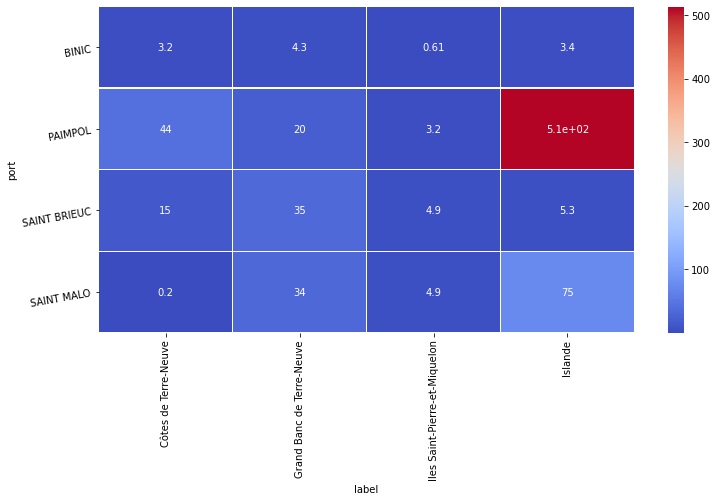

In [74]:
table_chi2(exp_piv_1,(12,6))

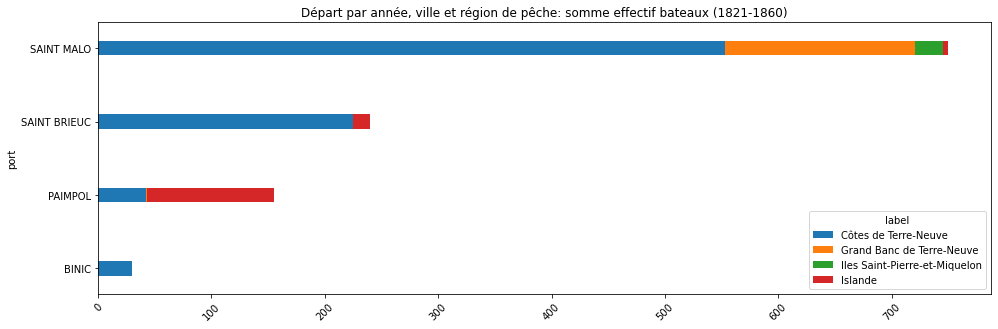

In [43]:
exp_piv_1.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux (1821-1860)')
plt.xticks(rotation=45)
plt.show()

### Deuxième période 1860 ->

In [44]:
### regrouper et additionner par port et destination pour toute la période
g2 = exp_2.groupby(['port','label'])['eff_bateaux'].sum().reset_index(name='sum')
g2

,port,label,sum
0,BINIC,Côtes de Terre-Neuve,143
1,BINIC,Iles Saint-Pierre-et-Miquelon,2
2,BINIC,Islande,265
3,PAIMPOL,Côtes de Terre-Neuve,103
4,PAIMPOL,Islande,1661
5,SAINT BRIEUC,Côtes de Terre-Neuve,653
6,SAINT BRIEUC,Islande,670
7,SAINT MALO,Côtes de Terre-Neuve,1831
8,SAINT MALO,Grand Banc de Terre-Neuve,115
9,SAINT MALO,Iles Saint-Pierre-et-Miquelon,3


In [45]:
X = 'port'
Y = 'label'
Z = 'sum'
exp_piv_2 = pd.pivot_table(g2,values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
exp_piv_2

label,Côtes de Terre-Neuve,Grand Banc de Terre-Neuve,Iles Saint-Pierre-et-Miquelon,Islande,Total
port,,,,,
BINIC,143,0,2,265,410
PAIMPOL,103,0,0,1661,1764
SAINT BRIEUC,653,0,0,670,1323
SAINT MALO,1831,115,3,110,2059
Total,2730,115,5,2706,5556


3125.1176735397567


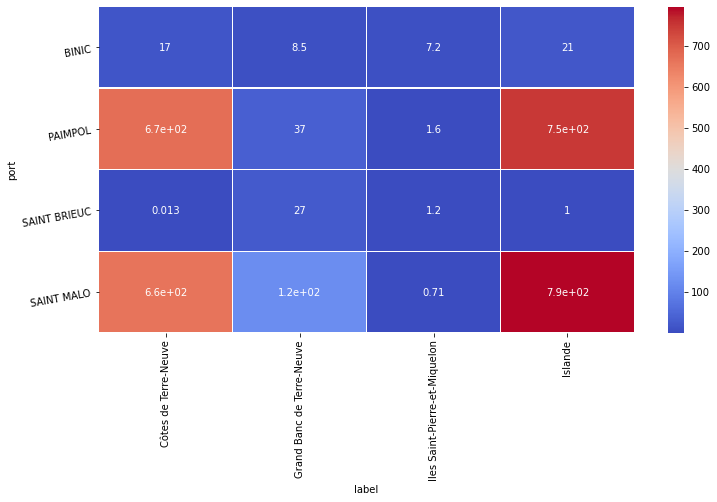

In [73]:
table_chi2(exp_piv_2,(12,6))

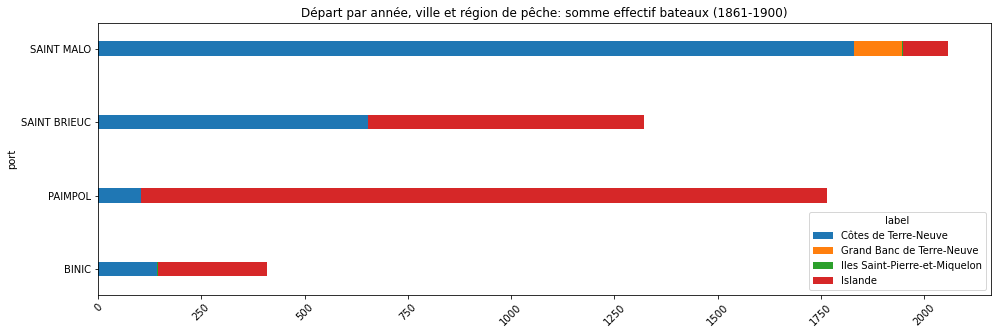

In [47]:
exp_piv_2.iloc[:-1,:-1].plot( kind='barh', stacked=True,  width=0.2,  figsize=(16,5),  title = 'Départ par année, ville et région de pêche: somme effectif bateaux (1861-1900)')
plt.xticks(rotation=45)
plt.show()

# Évolution de la pêche 1816-1915

## Évolution des destinations par périodes de 5 ans (lieux de pêche)

In [49]:
peche_morutiere[140:145]

,id,valeurs,champs,n_page,port,annee,eff_bateaux,lieu_peche,code,label,_merge
140,140,1614///HONFLEUR///15///30///0///140///0///BREA...,8,88,HONFLEUR,1614,15,30,30,Côtes de Terre-Neuve,both
141,141,1614///DUNKERQUE///7///50///0///0///0! RIN 1936,7,88,DUNKERQUE,1614,7,50,50,Islande,both
142,142,1615///HONFLEUR///10///1///0///290///OTBRE ARD...,8,88,HONFLEUR,1615,10,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both
143,143,1615///SAINT MALO///7///32///0///0///0///MORAN...,8,88,SAINT MALO,1615,7,32,32,Terre-Neuve : Petit-Nord,both
144,144,"1616///HONFLEUR///""Ï3///1///0///0///"" 0 BREARD...",7,88,HONFLEUR,1616,0,1,1,"Lieu de pêche imprécis, Terre-Neuve au sens large",both


In [50]:
lustres = [x for x in range(1816,1915, 5)]
lustres[:5], lustres[-5:]

([1816, 1821, 1826, 1831, 1836], [1891, 1896, 1901, 1906, 1911])

In [52]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html


peche_1816_1915 = peche_morutiere[peche_morutiere['annee'].between(1816,1915)].copy(deep=True)
peche_1816_1915['lustre'] = pd.cut(peche_1816_1915['annee'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
peche_1816_1915['lustre'] = peche_1816_1915['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
# Inspection
peche_1816_1915.head()

,id,valeurs,champs,n_page,port,annee,eff_bateaux,lieu_peche,code,label,_merge,lustre
887,887,1816///GRANVILLE///55///30///0///0///0 GIBON 1...,7,104,GRANVILLE,1816,55,30,30,Côtes de Terre-Neuve,both,1816-1821
888,888,1816///DUNKERQUE///60///50///863///4618///2542...,8,104,DUNKERQUE,1816,60,50,50,Islande,both,1816-1821
889,889,1816///DUNKERQUE///4///30///53///371///2531 H ...,7,104,DUNKERQUE,1816,4,30,30,Côtes de Terre-Neuve,both,1816-1821
890,890,1816///DUNKERQUE///29///70///280///1432///354 ...,7,104,DUNKERQUE,1816,29,70,70,Mer du Nord,both,1816-1821
891,891,1816///DIEPPE///13///10///0///o///0! MORANDIER...,7,104,DIEPPE,1816,13,10,10,Grand Banc de Terre-Neuve,both,1816-1821


In [54]:
# peche_1816_1915['eff_bateaux'] = peche_1816_1915['eff_bateaux'].apply(lambda x : int(x) if x.isdigit() else 0)

In [55]:
### regrouper et additionner par port et destination pour toute la période
g_peche = peche_1816_1915.groupby(['lustre','label'])['eff_bateaux'].sum().reset_index(name='sum')
g_peche.iloc[35:45]

,lustre,label,sum
35,1826-1831,Terre-Neuve : Petit-Nord,NaN
36,1831-1836,Acadie,NaN
37,1831-1836,Côte du Labrador,NaN
38,1831-1836,Côtes de Terre-Neuve,518.0
39,1831-1836,Dogger Bank,7.0
40,1831-1836,Grand Banc de Terre-Neuve,330.0
41,1831-1836,Groenland,NaN
42,1831-1836,Iles Saint-Pierre-et-Miquelon,319.0
43,1831-1836,Islande,369.0
44,1831-1836,"Lieu de pêche imprécis, Terre-Neuve au sens large",NaN


In [56]:
g_peche[g_peche['sum']>0]

,lustre,label,sum
2,1816-1821,Côtes de Terre-Neuve,560.0
4,1816-1821,Grand Banc de Terre-Neuve,208.0
6,1816-1821,Iles Saint-Pierre-et-Miquelon,27.0
7,1816-1821,Islande,227.0
10,1816-1821,Mer du Nord,152.0
...,...,...,...
211,1901-1906,Islande,773.0
218,1906-1911,Côtes de Terre-Neuve,1019.0
219,1906-1911,Dogger Bank,247.0
222,1906-1911,Iles Saint-Pierre-et-Miquelon,311.0


In [57]:
X = 'lustre'
Y = 'label'
Z = 'sum'
piv_peche = pd.pivot_table(g_peche[g_peche['sum']>0],values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
piv_peche

label,Côtes de Terre-Neuve,Dogger Bank,Grand Banc de Terre-Neuve,Groenland,Iles Saint-Pierre-et-Miquelon,Islande,"Lieu de pêche imprécis, Terre-Neuve au sens large",Mer Baltique,Mer du Nord,Total
lustre,,,,,,,,,,
1816-1821,560,0,208,0,27,227,0,0,152,1174
1821-1826,670,0,98,0,4,317,16,0,70,1175
1826-1831,524,0,100,0,0,380,0,10,48,1062
1831-1836,518,7,330,0,319,369,0,0,0,1543
1836-1841,706,0,788,0,59,483,0,0,0,2036
1841-1846,200,0,187,0,37,384,0,0,0,808
1846-1851,87,0,69,0,1,399,0,0,0,556
1851-1856,178,0,95,0,2,698,84,0,0,1057
1856-1861,135,0,155,0,204,903,681,0,0,2078


26854.726034854415


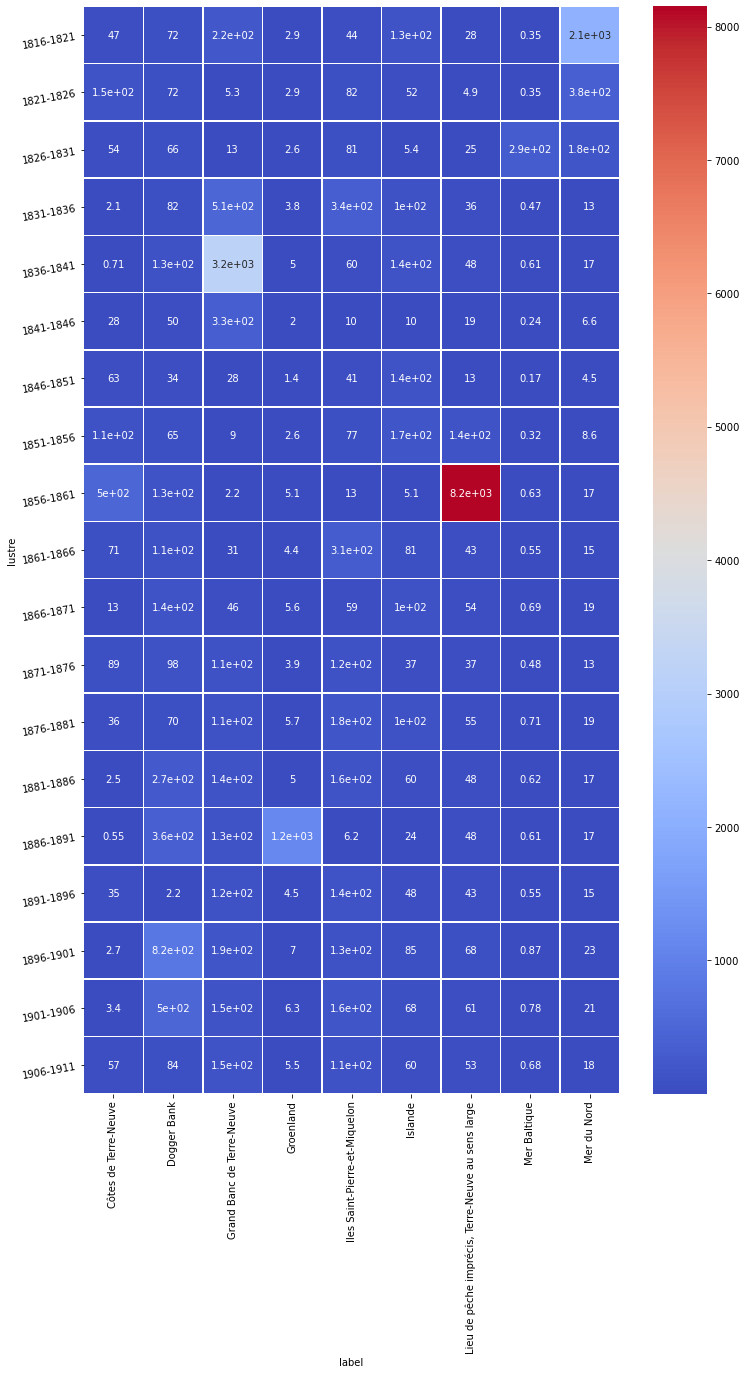

In [71]:
table_chi2(piv_peche,(12,20))

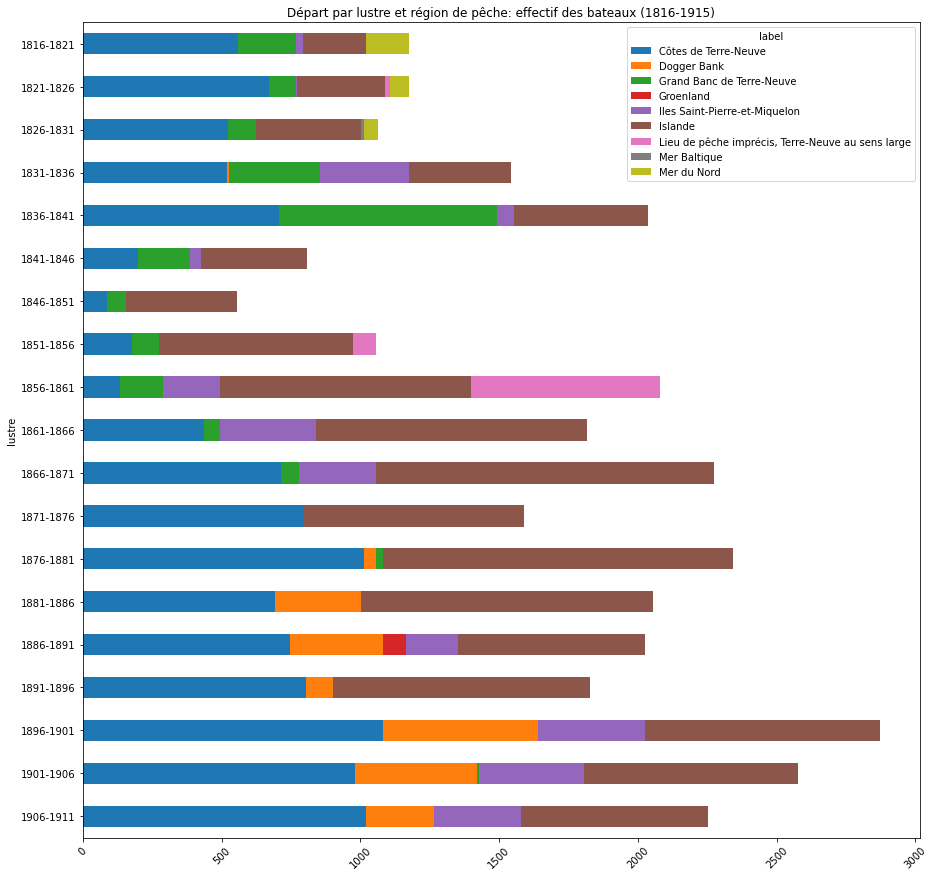

In [59]:
piv_peche.iloc[:-1,:-1].sort_index(ascending=False).plot( kind='barh', stacked=True,  width=0.5,  figsize=(15,15),  \
                             title = 'Départ par lustre et région de pêche: effectif des bateaux (1816-1915)')
plt.xticks(rotation=45)
plt.show()

## Évolution de l'activité des ports (périodes de 5 ans)

In [62]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

port_1816_1915 = peche_morutiere[(peche_morutiere['annee'].between(1816,1915)) & (peche_morutiere['port'].str.contains("BRIEU|PORT|BIN|PAIM|MALO|DUNK|FECA|GRANV"))].copy(deep=True)
port_1816_1915['lustre'] = pd.cut(port_1816_1915['annee'], lustres, right=False)
### Transformer le code ajouté pour qu'il soit plus lisible
port_1816_1915['lustre'] = port_1816_1915['lustre'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))
# Inspection
port_1816_1915.head()

,id,valeurs,champs,n_page,port,annee,eff_bateaux,lieu_peche,code,label,_merge,lustre
887,887,1816///GRANVILLE///55///30///0///0///0 GIBON 1...,7,104,GRANVILLE,1816,55,30,30,Côtes de Terre-Neuve,both,1816-1821
888,888,1816///DUNKERQUE///60///50///863///4618///2542...,8,104,DUNKERQUE,1816,60,50,50,Islande,both,1816-1821
889,889,1816///DUNKERQUE///4///30///53///371///2531 H ...,7,104,DUNKERQUE,1816,4,30,30,Côtes de Terre-Neuve,both,1816-1821
890,890,1816///DUNKERQUE///29///70///280///1432///354 ...,7,104,DUNKERQUE,1816,29,70,70,Mer du Nord,both,1816-1821
892,892,1816///FECAMP///7///30///100///607///0| MORAND...,7,104,FECAMP,1816,7,30,30,Côtes de Terre-Neuve,both,1816-1821


In [64]:
## port_1816_1915['eff_bateaux'] = port_1816_1915['eff_bateaux'].apply(lambda x : int(x) if x.isdigit() else 0)

In [65]:
### regrouper et additionner par port et destination pour toute la période
g_port = port_1816_1915.groupby(['lustre','port'])['eff_bateaux'].sum().reset_index(name='sum')
g_port.iloc[35:45]

,lustre,port,sum
35,1831-1836,SAINT'MALO,NaN
36,1836-1841,'SAINT BRIEUC,NaN
37,1836-1841,BINIC,NaN
38,1836-1841,DUNKERQUE,NaN
39,1836-1841,FECAMP,NaN
40,1836-1841,GRANVILLE,NaN
41,1836-1841,PAIMPOL,NaN
42,1836-1841,SAINT BRIEUC,NaN
43,1836-1841,SAINT MALO,NaN
44,1836-1841,SAINT'MALO,NaN


In [66]:
g_port[g_port['sum']>0]

,lustre,port,sum
2,1816-1821,DUNKERQUE,351.0
3,1816-1821,FECAMP,20.0
4,1816-1821,GRANVILLE,266.0
6,1816-1821,SAINT BRIEUC,91.0
7,1816-1821,SAINT MALO,48.0
...,...,...,...
165,1906-1911,FECAMP,230.0
166,1906-1911,GRANVILLE,114.0
167,1906-1911,PAIMPOL,215.0
168,1906-1911,SAINT BRIEUC,21.0


In [67]:
X = 'lustre'
Y = 'port'
Z = 'sum'
piv_port = pd.pivot_table(g_port[g_port['sum']>0],values=Z,index=X,columns=Y,aggfunc=np.sum,margins=True,margins_name="Total") \
        .fillna(0).astype(int)
piv_port

port,'SAINT BRIEUC,BINIC,DUNKERQUE,FECAMP,GRANVILLE,PAIMPOL,SAINT BRIEUC,SAINT MALO,Total
lustre,,,,,,,,,
1816-1821,0,0,351,20,266,0,91,48,776
1821-1826,0,0,298,0,48,0,0,74,420
1826-1831,52,30,421,48,223,43,90,190,1097
1831-1836,0,0,60,14,0,0,0,0,74
1841-1846,0,0,384,38,94,10,70,162,758
1846-1851,0,0,362,0,0,0,35,98,495
1851-1856,0,0,290,31,84,0,0,225,630
1856-1861,0,0,465,39,747,115,92,81,1539
1861-1866,0,39,622,126,117,153,201,84,1342


7916.233332258523


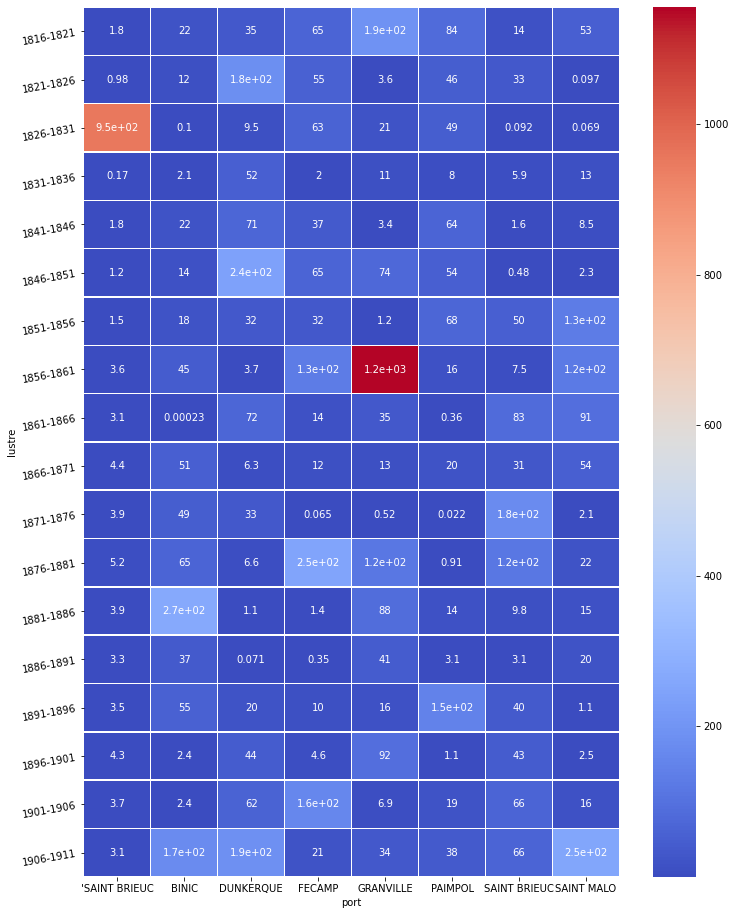

In [72]:
table_chi2(piv_port,(12,16))

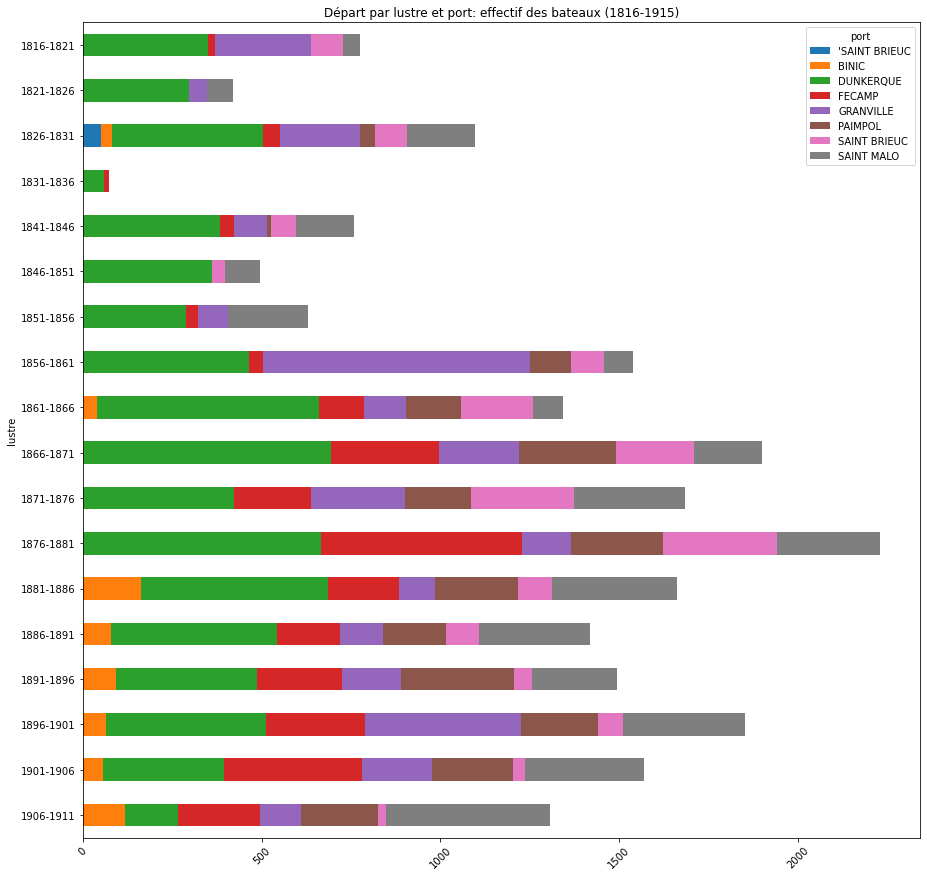

In [69]:
piv_port.iloc[:-1,:-1].sort_index(ascending=False).plot( kind='barh', stacked=True,  width=0.5,  figsize=(15,15),  \
                             title = 'Départ par lustre et port: effectif des bateaux (1816-1915)')
plt.xticks(rotation=45)
plt.show()